<a href="https://colab.research.google.com/github/AndrewstheBuilder/FromScratch_NeuralNetworks/blob/main/MultiLayerPerceptron_FromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

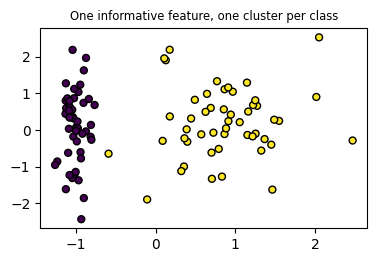

In [47]:
# Display Dataset to Train

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

# Import Dataset to Train
train_length = int(len(X1) * 0.8)
test_length = len(X1) - train_length
train_x, test_x, train_y, test_y = X1[0:train_length], X1[train_length:], Y1[0:train_length], Y1[train_length:]
# print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

In [5]:
# Multi Layer Perceptron Implementation
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return total

class MLP:
  def __init__():
    '''
    '''
    pass

  def train():
    '''
    '''
    pass

  def predict():
    '''
    '''
    pass
def relu(x):
  return max(0, x)

def relu_deriv(output_relu):
  if(output_relu>=0):
    return 1
  return 0

# First Attempt at solving this dataset with MLP

- I can attempt to solve this as a regression problem first
- Take in X and try to predict the Y for the 100 examples of [Xi, Yi] that I have. It will find the line separating the two classes I believe!
- And after that I can try it as a classification problem.
- Then solve the MNIST dataset with my MLP
- Then try to do it with a different architecture like KANs

### Draft 1: Has backpropagation for learning but its adjusting the weights and biases without taking into account the error and what direction we should be adjusting the weights in.
- This setup allows the ML algorithm to learn any linear 2 variable function.

In [6]:
weights = [1,1]
bias = 1
# n = Neuron(weights, None)
m = len(train_x)
iterations = 500
for n in range(iterations):
  for i in range(m):
    x1 = train_x[i][0]
    x2 = train_x[i][1]
    output = weights[0]*x1 + weights[1]*x2+ bias
    # Perform Loss Calculation
    error = (train_y[i] - output)
    # print('train_y[i]',train_y[i])
    # print('output',output)
    # Perform Back propagation to adjust the weight and bias
    weights[0] += -1 * x1
    weights[1] += -1 * x2
    bias += -1
  if(n%100 == 0):
    print('n:'+str(n)+' error:'+str(error))
# print(n)
# This implementation has the problem of exploding weights.
# I believe its because we are not taking into account the error. So we are adjusting
# the weight in the wrong direction

n:0 error:67.63922566894065
n:100 error:7134.142027824885
n:200 error:14200.644829980854
n:300 error:21267.147632136905
n:400 error:28333.650434292867


### Draft 2 There is no breaking symmetry here because the weights start out at the same value. But we introduce relu activation and use the error and learning rate to determine which direction and how much to adjust the weights and bias by.
- With a bias the weights start to cancel each other out and the bias starts to dominate the output
- Without a bias the weights find a equilibrium that leds to a inefficient solution. Its stuck in a pit. Forgot what this concept is called...

In [7]:
# Initialize weights start with the same values
weights = [1,1]
bias = 1

In [8]:
m = len(train_x)
print('len(train_x)',m)
iterations = 500
lr = 0.001
for n in range(iterations):
  correct = 0
  for i in range(m):
    x1 = train_x[i][0]
    x2 = train_x[i][1]
    output = weights[0]*x1 + weights[1]*x2 + bias
    output_relu = relu(output)
    # Perform Loss Calculation
    error = (train_y[i] - output_relu)
    # print('error',error)
    if(error<0.5 and error > -0.5):
      correct += 1
    # Perform Back propagation to adjust the weight and bias
    weights[0] -= -1 * relu_deriv(output_relu) * x1 * lr * error
    weights[1] -= -1 * relu_deriv(output_relu) * x2 * lr * error
    bias += -1 * relu_deriv(output_relu) * lr * error
  if(n%10 == 0):
    print('----'*10)
    print('At the end of iteration:')
    print('n:'+str(n)+' Train Accuracy:'+str(correct/m))
    print('weights',weights)
    print('bias',bias)
    print('Sample input',train_x[m-1])
    print('Sample output f(x)=w1*x1 + w2*x2 + b --> ',output)
    # print('----'*10)
# print(n)

len(train_x) 80
----------------------------------------
At the end of iteration:
n:0 Train Accuracy:0.5125
weights [0.9429901012571853, 0.9367715136055565]
bias 1.056090688001249
Sample input [ 0.480248   -1.25160908]
Sample output f(x)=w1*x1 + w2*x2 + b -->  0.3367565230030982
----------------------------------------
At the end of iteration:
n:10 Train Accuracy:0.1375
weights [0.47300920362892224, 0.5220407257590184]
bias 1.797378661173485
Sample input [ 0.480248   -1.25160908]
Sample output f(x)=w1*x1 + w2*x2 + b -->  1.3722433787392165
----------------------------------------
At the end of iteration:
n:20 Train Accuracy:0.0
weights [0.3243940068791164, 0.3677985423356971]
bias 3.387685857029445
Sample input [ 0.480248   -1.25160908]
Sample output f(x)=w1*x1 + w2*x2 + b -->  3.0855951610961183
----------------------------------------
At the end of iteration:
n:30 Train Accuracy:0.0
weights [0.4721730662601925, 0.28189218548296635]
bias 6.925810421539788
Sample input [ 0.480248   -1.

### Draft 3 Introducing Breaking Symmetry
* By initializing weights and bias randomly
* It seems like now the bias has grown to cancel out the weights contribution. Its not immediately clear what breaking the symmetry has done. I wonder how they discovered this concept...

In [50]:
# Initialize weights
np.random.seed(1)
weights = np.random.randn(2,)
bias = np.random.randn(1)[0]

m = len(train_x)
print('len(train_x)',m)
iterations = 500
lr = 0.001
correct_points = np.array([])
for n in range(iterations):
  correct = 0
  for i in range(m):
    x1 = train_x[i][0]
    x2 = train_x[i][1]
    output = weights[0]*x1 + weights[1]*x2 + bias
    output_relu = relu(output)
    # Perform Loss Calculation
    error = (train_y[i] - output_relu)
    # print('error',error)
    if(error<0.5 and error > -0.5):
      correct += 1
      if(n == iterations-1):
        np.append(train_x[i], correct_points, axis=0)
    # Perform Back propagation to adjust the weight and bias
    weights[0] -= -1 * relu_deriv(output_relu) * x1 * lr * error
    weights[1] -= -1 * relu_deriv(output_relu) * x2 * lr * error
    bias += -1 * relu_deriv(output_relu) * lr * error
  if(n%100 == 0):
    print('----'*10)
    print('At the end of iteration:')
    print('n:'+str(n)+' Train Accuracy:'+str(correct/m))
    print('weights',weights)
    print('bias',bias)
    print('Sample input',train_x[m-1])
    print('Sample output f(x)=w1*x1 + w2*x2 + b --> ',output)
    # print('----'*10)
# print(n)

len(train_x) 80
----------------------------------------
At the end of iteration:
n:0 Train Accuracy:0.675
weights [ 1.61503818 -0.60095267]
bias -0.5357613078534877
Sample input [0.44594963 0.31354772]
Sample output f(x)=w1*x1 + w2*x2 + b -->  -0.003260143769756585
----------------------------------------
At the end of iteration:
n:100 Train Accuracy:0.5125
weights [2.36292926 0.13157573]
bias -2.9132853965932983
Sample input [0.44594963 0.31354772]
Sample output f(x)=w1*x1 + w2*x2 + b -->  -1.8175798679639001
----------------------------------------
At the end of iteration:
n:200 Train Accuracy:0.5
weights [3.8624782 0.5133919]
bias -6.048945322579572
Sample input [0.44594963 0.31354772]
Sample output f(x)=w1*x1 + w2*x2 + b -->  -4.164798902651244
----------------------------------------
At the end of iteration:
n:300 Train Accuracy:0.5
weights [5.23913293 0.75961859]
bias -9.147444965884471
Sample input [0.44594963 0.31354772]
Sample output f(x)=w1*x1 + w2*x2 + b -->  -6.57217605708

[]
(80, 2)
(0,)


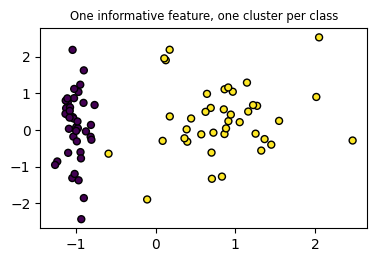

In [51]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize="small")
plt.scatter(train_x[:, 0], train_x[:, 1], marker="o", c=train_y, s=25, edgecolor="k")
print(correct_points)
print(train_x.shape)
print(correct_points.shape)
# TODO: draw last iteration MLP predictions on training set on graph stopped here
  # I want to see the function that its learning
  # Since the function that my network is able to learn is linear it does not look like
  # it can learn what is displayed on the graph
  # equation is f(x) = w1*x1 + w2*x2 + b

### Draft 4: New and Improved Neural Network

In [11]:
# Parameter Initialization
np.random.seed(1)
weights = np.random.randn(2,)
bias = np.random.randn(1)[0]

In [12]:
# Training
m = len(train_x)
print('len(train_x)',m)
iterations = 100
lr = 0.001
for n in range(iterations):
  correct = 0
  for i in range(m):
    x1 = train_x[i][0]
    x2 = train_x[i][1]
    output = weights[0]*x1 + weights[1]*x2 + bias
    output_relu = relu(output)
    # Perform Loss Calculation
    error = (train_y[i] - output_relu)
    # print('error',error)
    if(error<0.5 and error > -0.5):
      correct += 1
    # Perform Back propagation to adjust the weight and bias
    weights[0] -= -1 * relu_deriv(output_relu) * x1 * lr * error
    weights[1] -= -1 * relu_deriv(output_relu) * x2 * lr * error
    bias += -1 * relu_deriv(output_relu) * lr * error
  if(n%20 == 0):
    print('----'*10)
    print('At the end of iteration:')
    print('n:'+str(n)+' Train Accuracy:'+str(correct/m))
    print('weights',weights)
    print('bias',bias)
    print('Sample input',train_x[m-1])
    print('Sample output f(x)=w1*x1 + w2*x2 + b --> ',output)
    # print('----'*10)
# print(n)

len(train_x) 80
----------------------------------------
At the end of iteration:
n:0 Train Accuracy:0.3125
weights [ 1.57655964 -0.54789462]
bias -0.5319193403779491
Sample input [ 0.480248   -1.25160908]
Sample output f(x)=w1*x1 + w2*x2 + b -->  0.9116969326822273
----------------------------------------
At the end of iteration:
n:20 Train Accuracy:0.5375
weights [0.93508333 0.30062506]
bias -0.9513419154624239
Sample input [ 0.480248   -1.25160908]
Sample output f(x)=w1*x1 + w2*x2 + b -->  -0.8785350690795837
----------------------------------------
At the end of iteration:
n:40 Train Accuracy:0.6125
weights [0.55121958 0.87802435]
bias -1.5526090887616393
Sample input [ 0.480248   -1.25160908]
Sample output f(x)=w1*x1 + w2*x2 + b -->  -2.386830235865439
----------------------------------------
At the end of iteration:
n:60 Train Accuracy:0.6375
weights [0.19640102 1.34990495]
bias -2.1144241908304906
Sample input [ 0.480248   -1.25160908]
Sample output f(x)=w1*x1 + w2*x2 + b -->  -

In [13]:
# Test
m_test = len(test_x)
correct=0
for i in range(m_test):
  x1 = test_x[i][0]
  x2 = test_x[i][1]
  output = weights[0]*x1 + weights[1]*x2 + bias
  output_relu = relu(output)
  # Perform Loss Calculation
  error = (test_y[i] - output_relu)
  # print('error',error)
  if(error<0.5 and error > -0.5):
    correct += 1
print(str(correct/m_test))

0.4


## Using existing SKlearn MLP Implementation

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(1,)).fit(train_x, train_y)

In [ ]:
clf.score(test_x, test_y)

0.45

In [ ]:
clf.predict(test_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print('test_y',test_y)

test_y [1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0]
